In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data=pd.read_csv('data/iris_1.csv')
data.head()

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.columns

Index(['150', '4', 'setosa', 'versicolor', 'virginica'], dtype='object')

In [11]:
data.duplicated().sum()

0

In [13]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [15]:
data.isna().sum()

150           0
4             0
setosa        0
versicolor    0
virginica     0
dtype: int64

In [25]:
corr_matrix = data.corr()
corr_matrix

,150,4,setosa,versicolor,virginica
150,1.000000,-0.118129,0.873738,0.820620,0.786971
4,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
setosa,0.873738,-0.426028,1.000000,0.962772,0.949402
versicolor,0.820620,-0.362894,0.962772,1.000000,0.956514
virginica,0.786971,-0.422987,0.949402,0.956514,1.000000


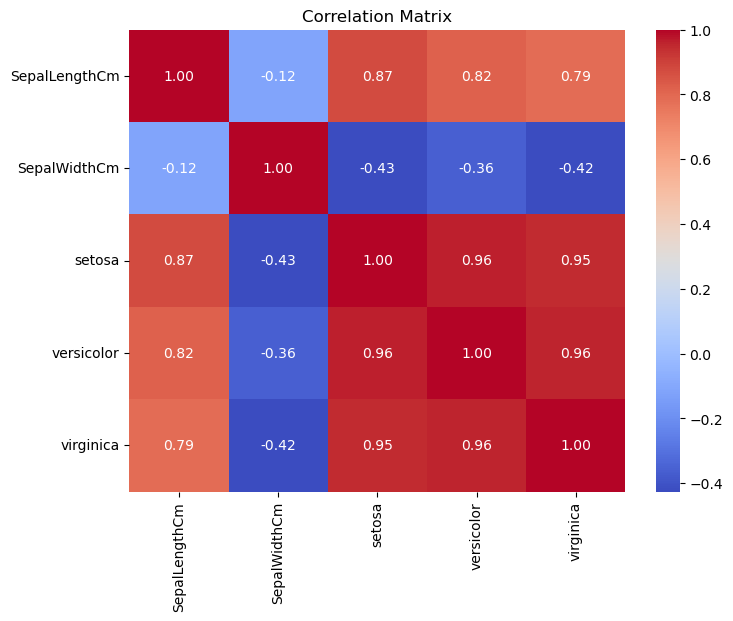

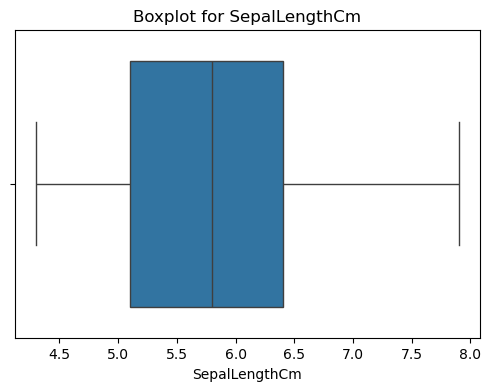

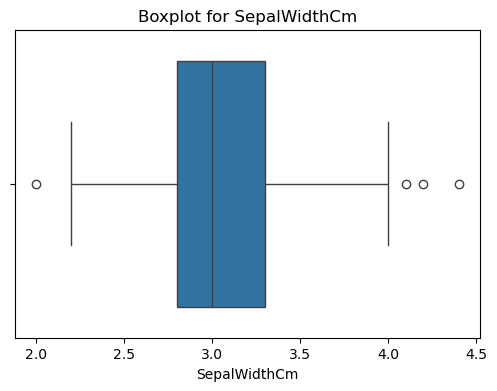

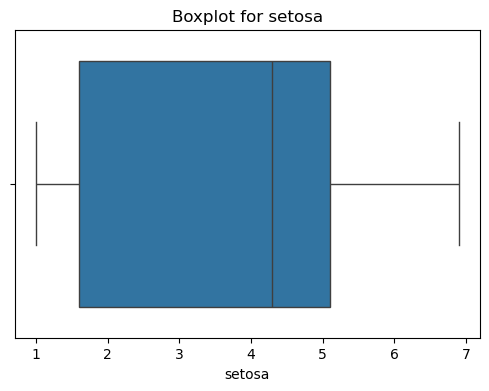

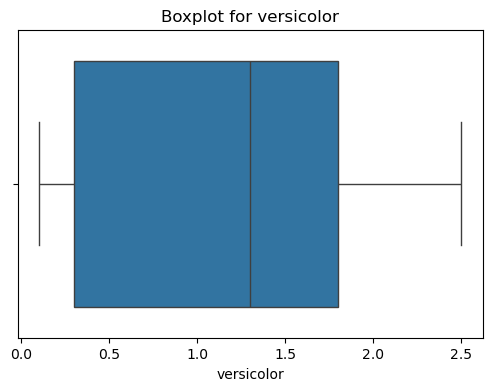

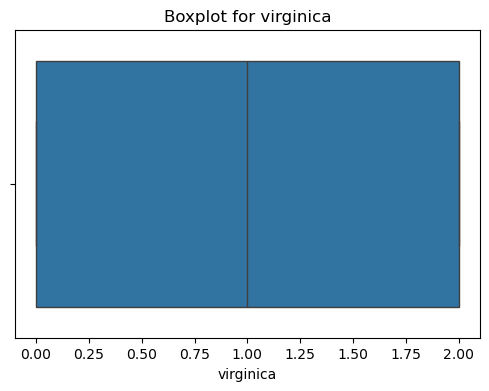

In [64]:
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'setosa', 'versicolor', 'virginica']

numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'setosa', 'versicolor', 'virginica']

# Compute and visualize the correlation matrix
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Outlier detection using boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [66]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'setosa', 'versicolor', 'virginica'], dtype='object')

In [68]:
# Select features and target

X = data[['SepalLengthCm', 'SepalWidthCm', 'setosa', 'versicolor']]
y = data['virginica']

In [70]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd=StandardScaler()
X_fit=sd.fit_transform(X)
X_fit

array([[-0.8980334 ,  1.01240113, -1.33325507, -1.30862368],
       [-1.13956224, -0.1373532 , -1.33325507, -1.30862368],
       [-1.38109108,  0.32254853, -1.39001364, -1.30862368],
       [-1.5018555 ,  0.09259766, -1.2764965 , -1.30862368],
       [-1.01879782,  1.242352  , -1.33325507, -1.30862368],
       [-0.53574014,  1.9322046 , -1.16297935, -1.04548613],
       [-1.5018555 ,  0.78245027, -1.33325507, -1.17705491],
       [-1.01879782,  0.78245027, -1.2764965 , -1.30862368],
       [-1.74338434, -0.36730407, -1.33325507, -1.30862368],
       [-1.13956224,  0.09259766, -1.2764965 , -1.44019246],
       [-0.53574014,  1.47230287, -1.2764965 , -1.30862368],
       [-1.26032666,  0.78245027, -1.21973792, -1.30862368],
       [-1.26032666, -0.1373532 , -1.33325507, -1.44019246],
       [-1.86414876, -0.1373532 , -1.50353079, -1.44019246],
       [-0.05268246,  2.16215547, -1.44677222, -1.30862368],
       [-0.17344688,  3.08195894, -1.2764965 , -1.04548613],
       [-0.53574014,  1.

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fit, y, test_size=0.20, random_state=42)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

svc = SVC(kernel='linear', C=900)
log_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)

svc.fit(X_train, Y_train)
log_reg.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

svc_pred = svc.predict(X_test)
log_reg_pred = log_reg.predict(X_test)
knn_pred = knn.predict(X_test)

svc_accuracy = accuracy_score(Y_test, svc_pred)
log_reg_accuracy = accuracy_score(Y_test, log_reg_pred)
knn_accuracy = accuracy_score(Y_test, knn_pred)

# Print accuracy scores
print(f"SVC Accuracy: {svc_accuracy}")
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")


SVC Accuracy: 1.0
Logistic Regression Accuracy: 1.0
KNN Accuracy: 1.0


In [86]:
#END